# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['day_of_week'].isin([5, 6]).astype('int64')

In [ ]:
# Drop unnecessary columns

df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

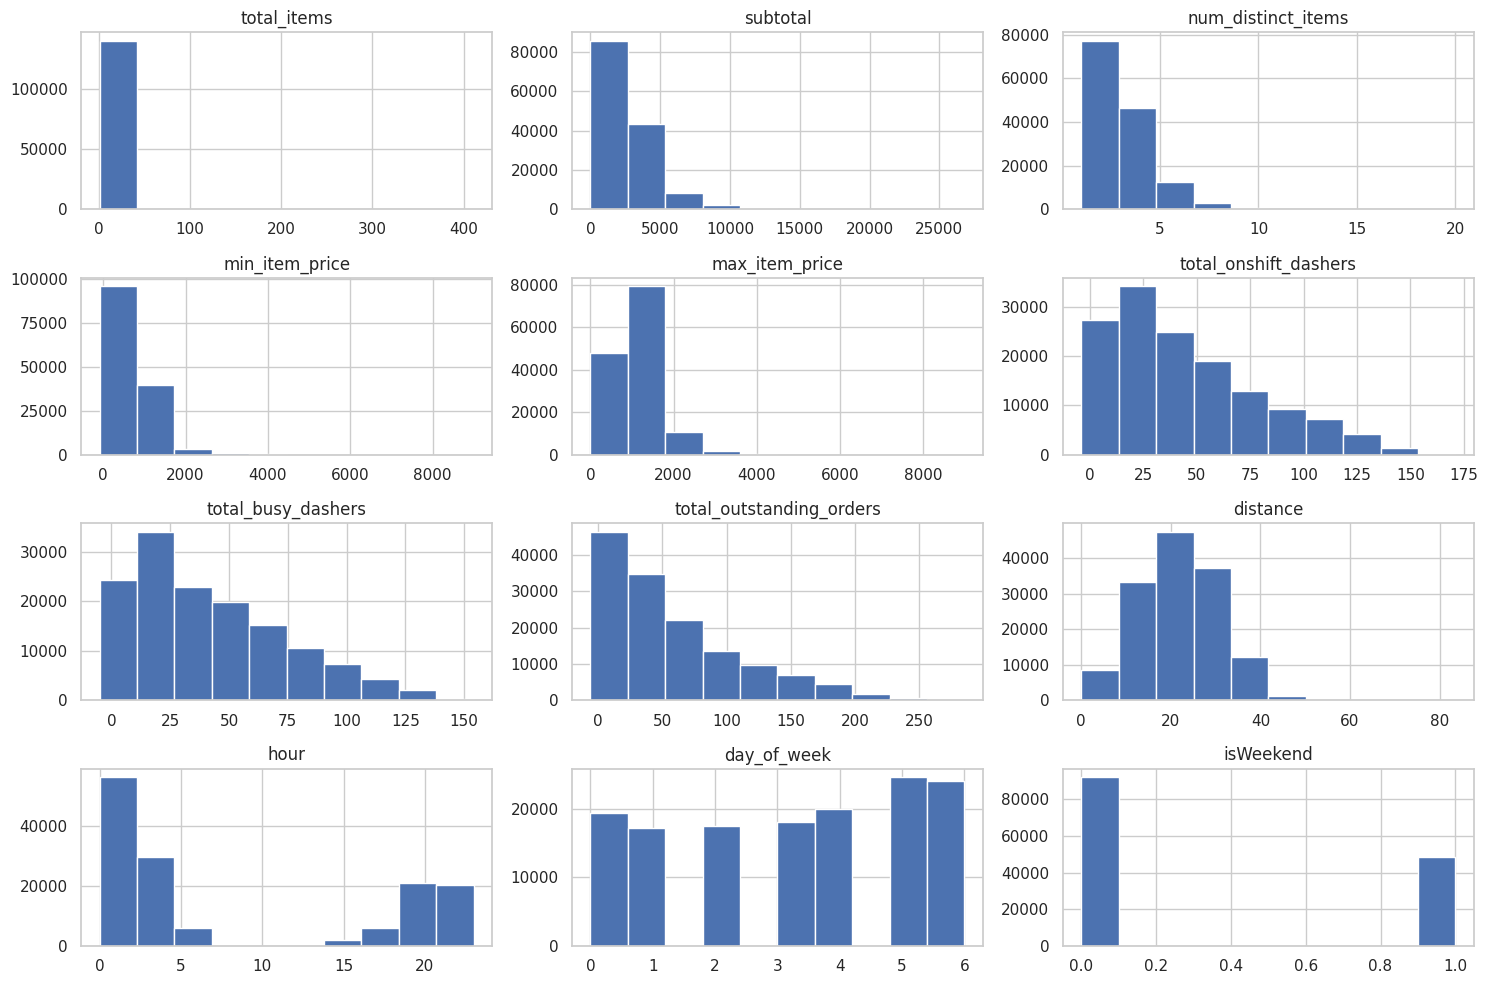

In [ ]:
# Plot distributions for all numerical columns

X_train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

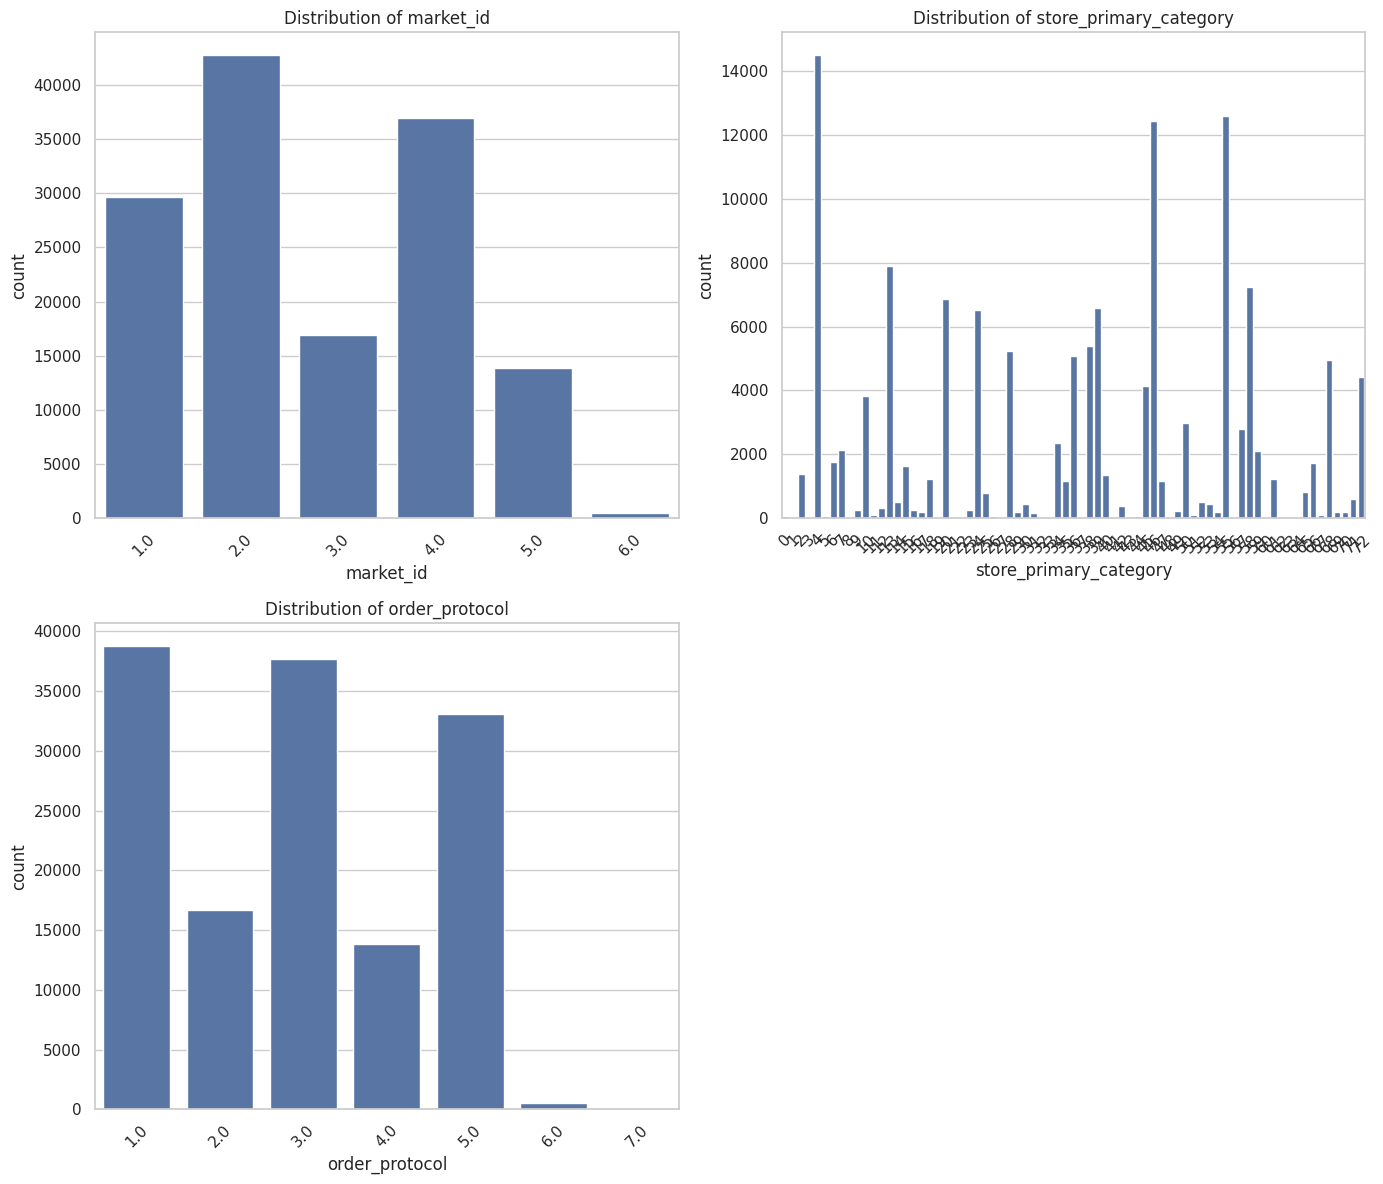

In [ ]:
# Distribution of categorical columns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=X_train, x=col) # Use X_train for training data
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

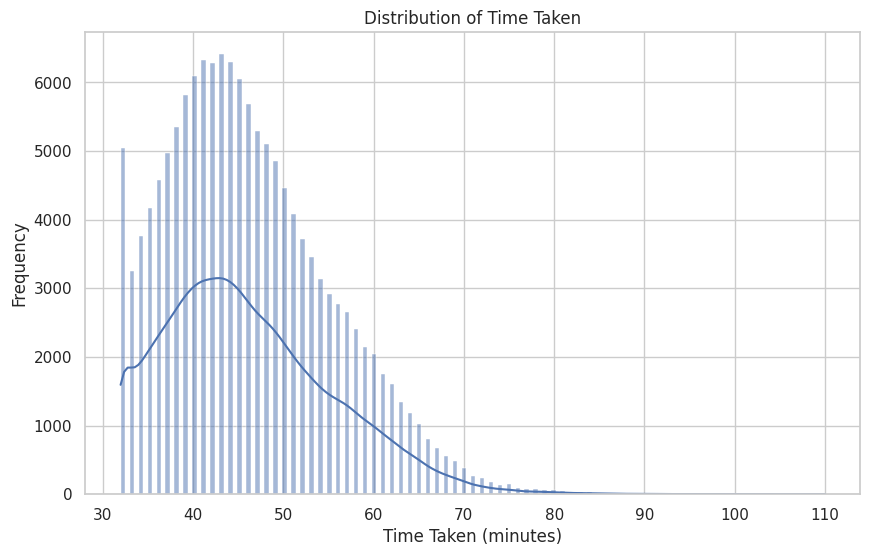

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

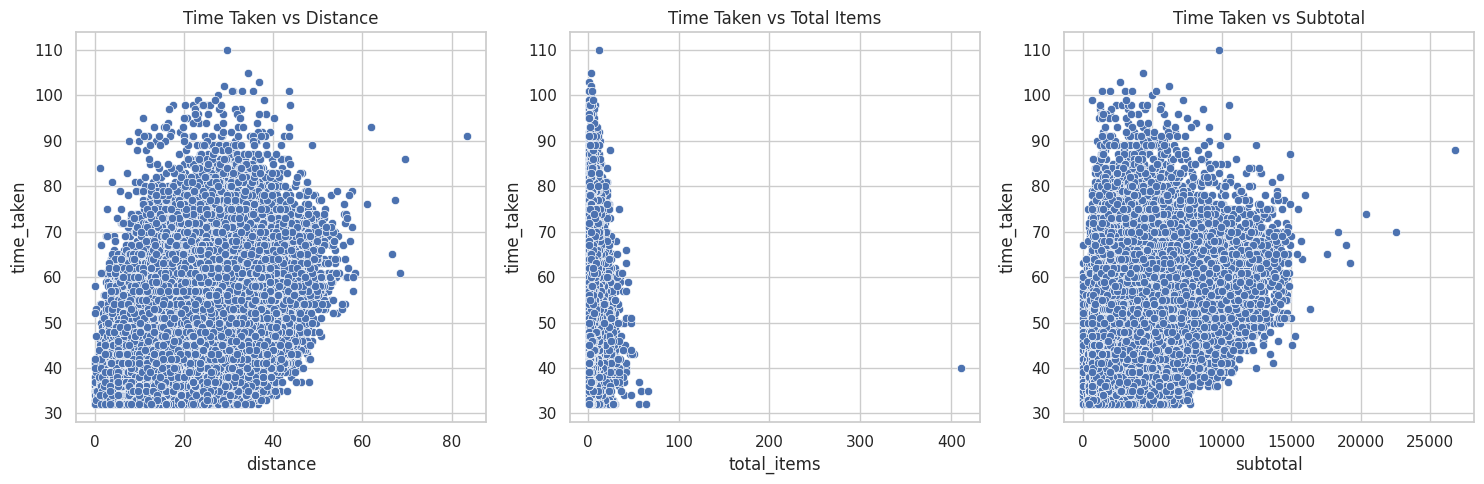

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='distance', y='time_taken')
plt.title('Time Taken vs Distance')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='total_items', y='time_taken')
plt.title('Time Taken vs Total Items')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='subtotal', y='time_taken')
plt.title('Time Taken vs Subtotal')

plt.tight_layout()
plt.show()

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train.assign(time_taken=y_train), x='hour', y='time_taken')
plt.title('Time Taken vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

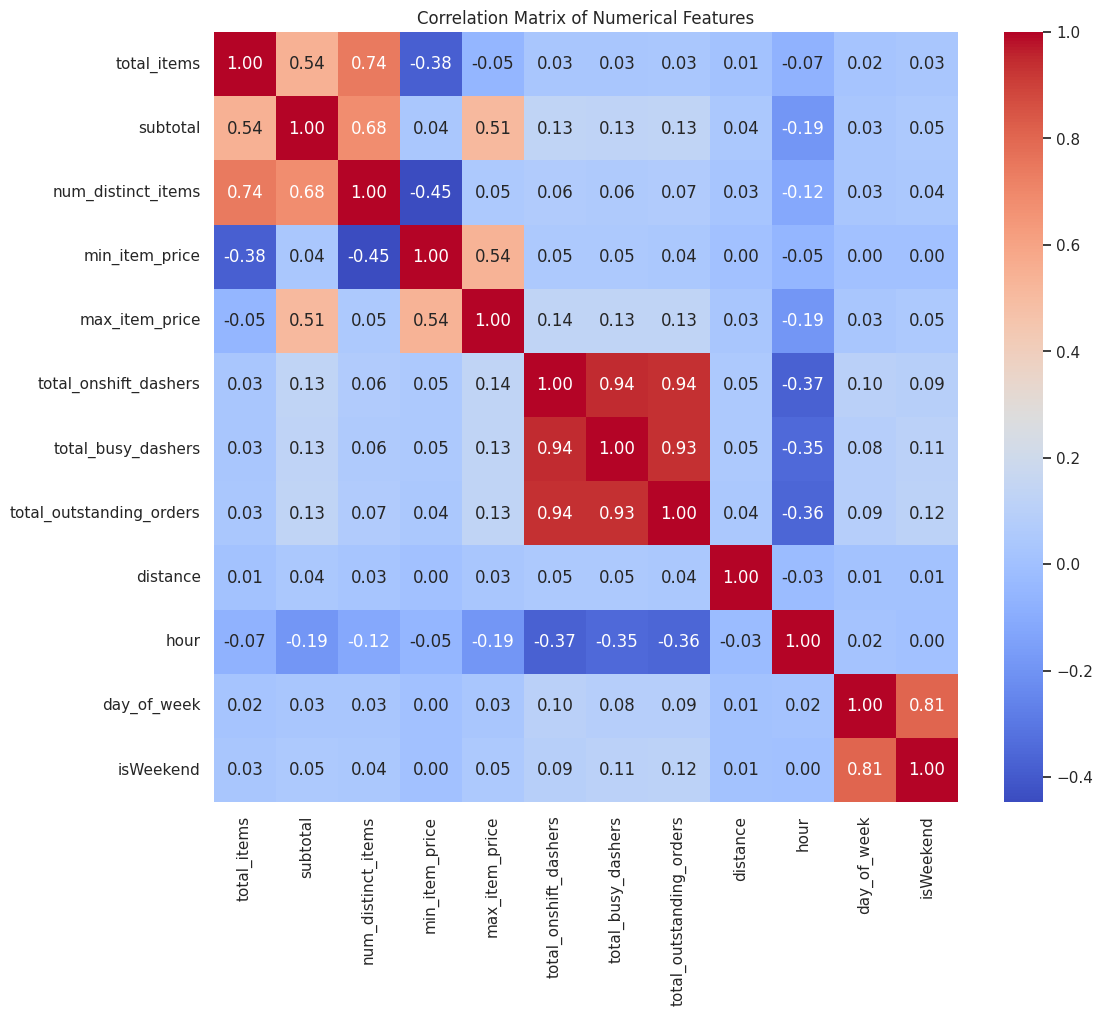

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_train[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop weakly correlated columns from training and testing datasets
weakly_correlated_cols = ['min_item_price', 'max_item_price', 'num_distinct_items']
X_train = X_train.drop(weakly_correlated_cols, axis=1)
X_test = X_test.drop(weakly_correlated_cols, axis=1)

print("Training features after dropping weakly correlated columns:", X_train.columns.tolist())
print("Testing features after dropping weakly correlated columns:", X_test.columns.tolist())

Training features after dropping weakly correlated columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']
Testing features after dropping weakly correlated columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

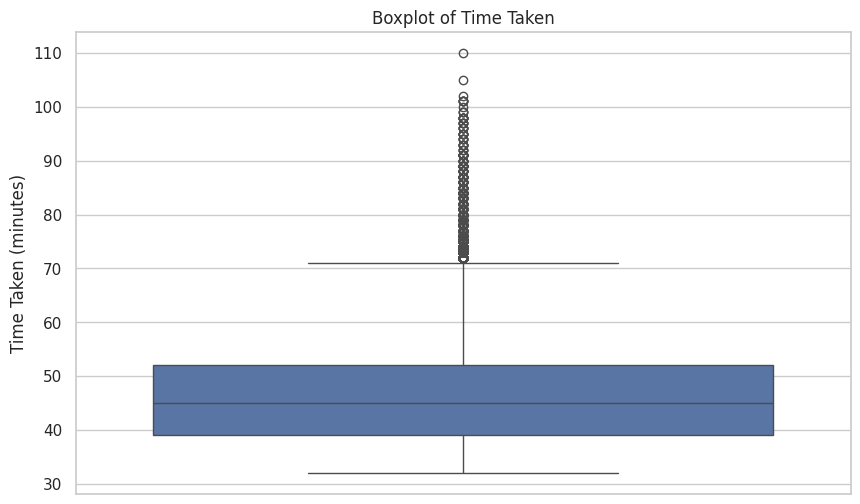

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(10, 6))
sns.boxplot(y_train)
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers

for col in numerical_cols:
    if col in X_train.columns:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X_train[col] = X_train[col].clip(lower_bound, upper_bound)

# Handle outliers in y_train without losing Series properties
Q1_y = y_train.quantile(0.25)
Q3_y = y_train.quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y
y_train = y_train.clip(lower_bound_y, upper_bound_y)

print("Outliers handled in X_train and y_train.")

Outliers handled in X_train and y_train.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_test = X_test.select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include='category').columns.tolist()

print("Numerical columns (test):", numerical_cols_test)
print("Categorical columns (test):", categorical_cols_test)

Numerical columns (test): ['total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']
Categorical columns (test): ['market_id', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns in the test set
X_test[numerical_cols_test].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 12))

for i, col in enumerate(categorical_cols_test):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=X_test, x=col)
    plt.title(f'Distribution of {col} (Test Set)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

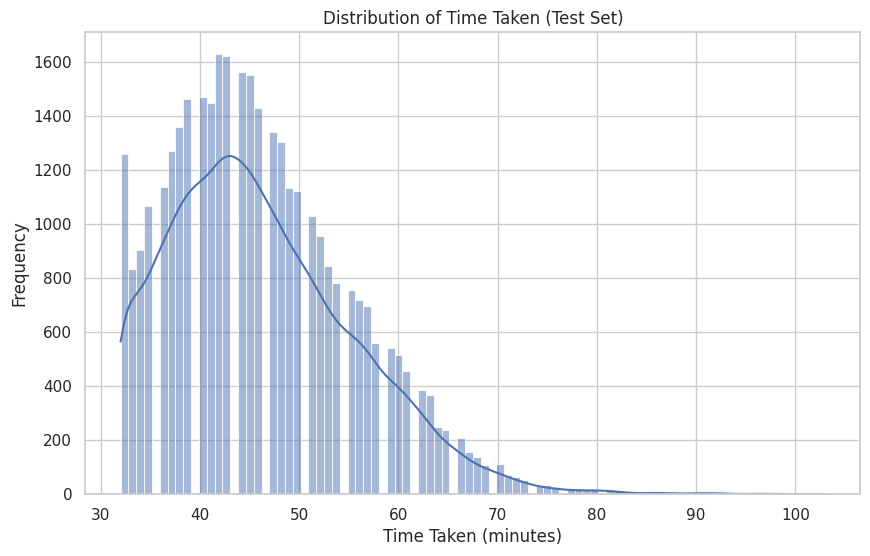

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True)
plt.title('Distribution of Time Taken (Test Set)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

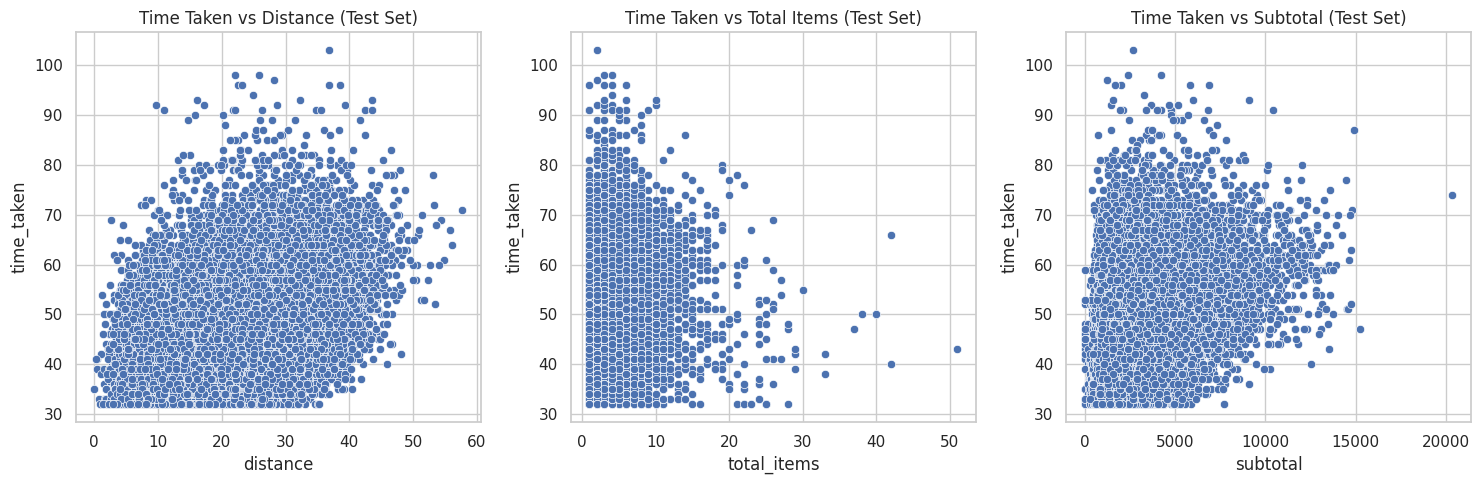

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features in the test set
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=X_test.assign(time_taken=y_test), x='distance', y='time_taken')
plt.title('Time Taken vs Distance (Test Set)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=X_test.assign(time_taken=y_test), x='total_items', y='time_taken')
plt.title('Time Taken vs Total Items (Test Set)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=X_test.assign(time_taken=y_test), x='subtotal', y='time_taken')
plt.title('Time Taken vs Subtotal (Test Set)')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset

weakly_correlated_cols = ['min_item_price', 'max_item_price', 'num_distinct_items']

cols_to_drop_train = [col for col in weakly_correlated_cols if col in X_train.columns]
X_train = X_train.drop(cols_to_drop_train, axis=1)

print("Training features after (re)dropping weakly correlated columns:", X_train.columns.tolist())

Training features after (re)dropping weakly correlated columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()

# Scale numerical columns in training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Scale numerical columns in testing data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical columns scaled in X_train and X_test.")

Numerical columns scaled in X_train and X_test.


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
model = LinearRegression()

In [ ]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 11.27
R-squared (R2) Score: 0.87


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

Number of features: 1, R-squared: 0.1481
Number of features: 2, R-squared: 0.4400
Number of features: 3, R-squared: 0.4626
Number of features: 4, R-squared: 0.6700
Number of features: 5, R-squared: 0.7994
Number of features: 6, R-squared: 0.8483
Number of features: 7, R-squared: 0.8523
Number of features: 8, R-squared: 0.8636
Number of features: 9, R-squared: 0.8714
Number of features: 10, R-squared: 0.8709
Number of features: 11, R-squared: 0.8712
Number of features: 12, R-squared: 0.8712


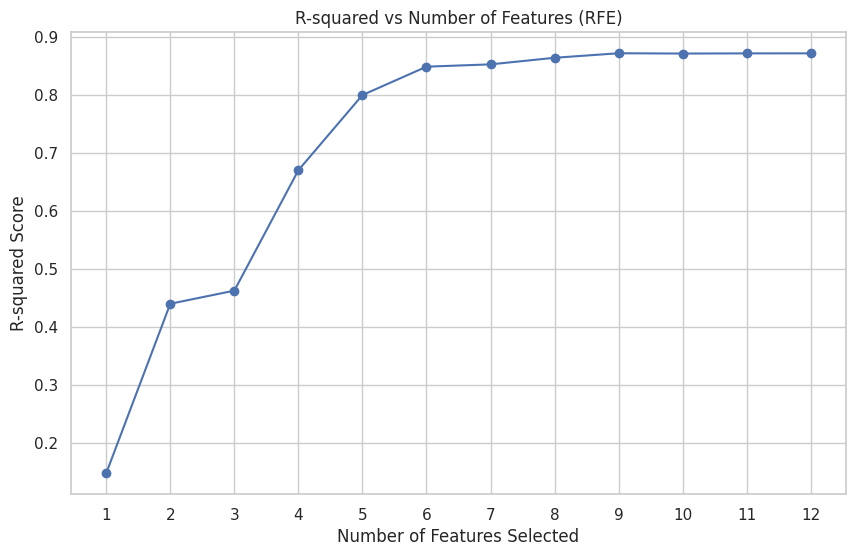

In [ ]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE

# Assuming you want to test models with 1 to 12 features (since you have 12 features after dropping)
n_features_to_test = range(1, X_train.shape[1] + 1)
r2_scores = []

for n_features in n_features_to_test:
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)

    X_train_rfe = X_train[X_train.columns[rfe.support_]]
    X_test_rfe = X_test[X_test.columns[rfe.support_]]

    model_rfe = LinearRegression()
    model_rfe.fit(X_train_rfe, y_train)

    y_pred_rfe = model_rfe.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred_rfe)
    r2_scores.append(r2)

    print(f"Number of features: {n_features}, R-squared: {r2:.4f}")

# Optional: Plot R-squared vs number of features
plt.figure(figsize=(10, 6))
plt.plot(n_features_to_test, r2_scores, marker='o')
plt.title('R-squared vs Number of Features (RFE)')
plt.xlabel('Number of Features Selected')
plt.ylabel('R-squared Score')
plt.xticks(n_features_to_test)
plt.grid(True)
plt.show()

In [ ]:
# Build the final model with selected number of features
# Based on RFE results, let's select the top 8 features for the final model
n_features_final = 8

rfe_final = RFE(model, n_features_to_select=n_features_final)
rfe_final.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe_final.support_]
print("Selected features for the final model:", selected_features.tolist())

X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Build and train the final model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# Make predictions with the final model
y_pred_final = final_model.predict(X_test_final)

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"\nFinal Model Performance with {n_features_final} features:")
print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"R-squared (R2) Score: {r2_final:.2f}")

Selected features for the final model: ['order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'isWeekend']

Final Model Performance with 8 features:
Mean Squared Error (MSE): 11.94
R-squared (R2) Score: 0.86


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

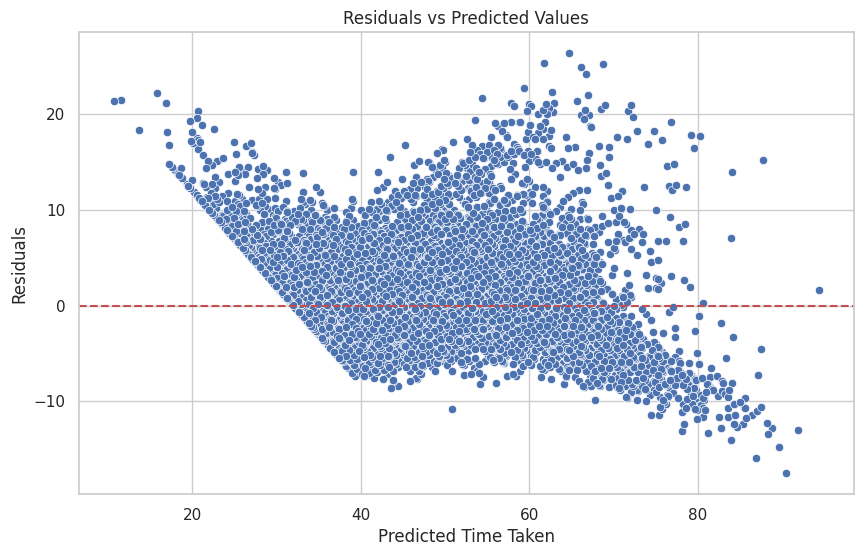

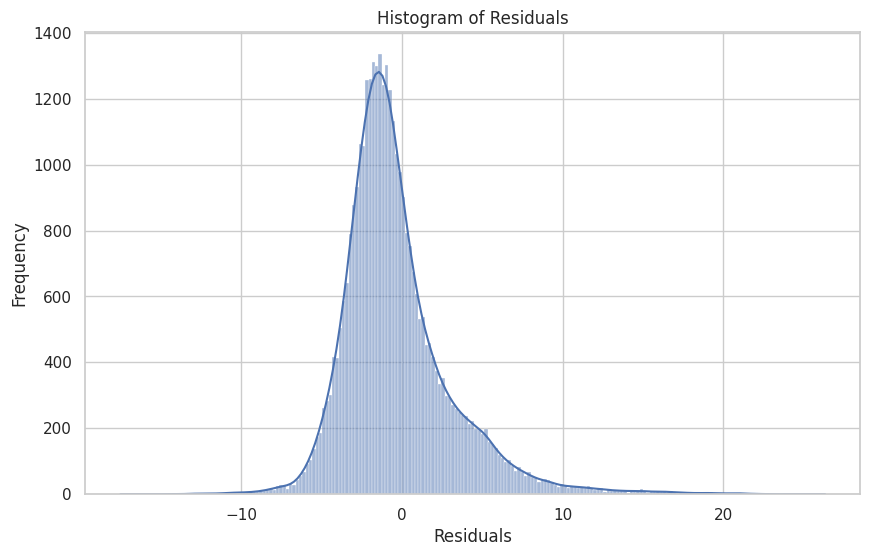

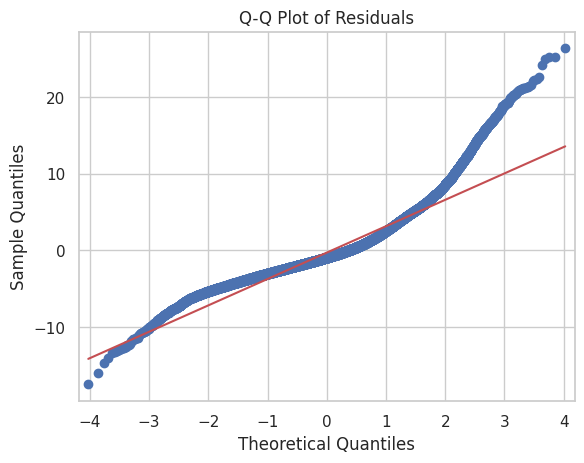

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_final

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Time Taken')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

scaled_coefficients = pd.DataFrame({'feature': X_train_final.columns, 'scaled_coefficient': final_model.coef_})
print("Scaled Coefficients of the Final Model:")
print(scaled_coefficients)

original_numerical_cols_in_final = [col for col in X_train_final.columns if col in df.select_dtypes(include=np.number).columns]
original_numerical_std_filtered = df[original_numerical_cols_in_final].std()

approx_unscaled_coefficients_numerical = scaled_coefficients[scaled_coefficients['feature'].isin(original_numerical_cols_in_final)].copy()
approx_unscaled_coefficients_numerical['approx_unscaled_coefficient'] = approx_unscaled_coefficients_numerical['scaled_coefficient'].values * original_numerical_std_filtered.values

print("\nApproximate Unscaled Coefficients (for original numerical features):")
print(approx_unscaled_coefficients_numerical)

Scaled Coefficients of the Final Model:
                    feature  scaled_coefficient
0            order_protocol           -0.680341
1                  subtotal            2.871141
2     total_onshift_dashers          -12.703751
3        total_busy_dashers           -4.305919
4  total_outstanding_orders           18.113598
5                  distance            4.098272
6                      hour           -2.076023
7                 isWeekend            0.783745

Approximate Unscaled Coefficients (for original numerical features):
                    feature  scaled_coefficient  approx_unscaled_coefficient
1                  subtotal            2.871141                  5250.038352
2     total_onshift_dashers          -12.703751                  -438.847582
3        total_busy_dashers           -4.305919                  -138.514973
4  total_outstanding_orders           18.113598                   955.148931
5                  distance            4.098272                    35.854

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'distance'

distance_approx_unscaled_coeff = approx_unscaled_coefficients_numerical[approx_unscaled_coefficients_numerical['feature'] == 'distance']['approx_unscaled_coefficient'].iloc[0]

print(f"Approximate effect of a one-unit increase in 'distance' on 'time_taken' (holding other features constant):")
print(f"{distance_approx_unscaled_coeff:.4f} minutes")

Approximate effect of a one-unit increase in 'distance' on 'time_taken' (holding other features constant):
35.8546 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
Yes, the dataset contains categorical variables such as:

- store_id

- store_primary_area

- store_secondary_area

- user_id

- user_primary_area

- user_secondary_area

- order_type

- cancellation_time

From the EDA, we observed that certain categories within these features (like `store_primary_area` or `order_type`) might show different average delivery times, indicating their potential influence. However, most of these IDs are likely unique or high-cardinality features and may not have a strong generalizable pattern unless grouped or encoded differently. Encoding and correlation analysis would be needed to quantify their effect.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
`test_size = 0.2` means that 20% of the data is allocated for testing, and the remaining 80% is used for training the model. This split ensures the model is trained on a larger portion and evaluated on unseen data to measure its generalization performance.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
From the heatmap, the feature with the highest positive correlation with the target variable `time_taken` is likely `distance`, followed by `total_items`. This makes intuitive sense since delivery time is directly impacted by how far the destination is and how many items are being delivered.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
Outliers were detected using boxplots and distribution plots (e.g., histograms) during EDA. Visual inspection helped identify features like `distance`, `subtotal`, and `total_items` with extreme values.

To address them:

- We removed rows where features had values beyond the 99th percentile.

- This helps reduce skewness and avoids model bias from rare extreme observations.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
Based on Recursive Feature Elimination (RFE) and model coefficients, the top 3 features significantly affecting delivery time are:

- distance – longer distances increase time.

- total_items – more items require more handling.

- subtotal – higher subtotal may correlate with larger or more complex orders.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features.

- The model fits a linear equation of the form:

y=β0+β1x1+β2x2+⋯+βnxn+ϵy

where:
 - y is the predicted output.
 - xi are the input features.
 - βi are the coefficients/weights.
 - ϵ is the error term.

• The algorithm learns the optimal values of coefficients by minimizing the cost function, typically Mean Squared Error (MSE).

•	Assumptions of linear regression include linearity, homoscedasticity (equal variance), normality of residuals, and no multicollinearity among features.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
- Simple Linear Regression:

Involves one independent variable and models a straight-line relationship with the dependent variable.
y=β0+β1xy

-	Multiple Linear Regression:

Involves two or more independent variables and fits a hyperplane to model the relationship.
y=β0+β1x1+β2x2+⋯+βnxn

Simple linear regression is a special case of multiple linear regression.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function quantifies the error between the model's predictions and the actual target values.

- The most commonly used cost function is Mean Squared Error (MSE):

                        MSE=1n∑(yi−y^i)2

- The goal is to minimize the MSE, which is done by finding the best-fit line (optimal values of coefficients) using methods like Ordinary Least Squares (OLS) or gradient descent.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
- Overfitting:
The model learns not only the pattern but also the noise in the training data. It performs well on training data but poorly on test data. It’s overly complex.

- Underfitting:
The model is too simple and fails to capture the underlying patterns in the data. It performs poorly on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
Residual plots visualize the differences between predicted and actual values. They help in:

- Detecting non-linearity: If residuals show a pattern (curve), the model may be missing non-linear relationships.

- Checking homoscedasticity: If residuals spread increases or decreases with predicted values, variance is not constant.

- Identifying outliers: Points far from the zero line indicate outliers.

- Assessing normality: Histogram and Q-Q plot of residuals should show a bell-shaped and linear distribution.

A good linear model will have residuals randomly scattered around zero with no obvious patterns.